## Hello, this notebook is purely experimental and not very pretty to look at. Why don't you try the other notebooks?

In [1]:
import pystan
import numpy as np

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    vector[J] y; // estimated treatment effects
    vector<lower=0>[J] sigma; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    vector[J] eta;
}
transformed parameters {
    vector[J] theta;
    theta = mu + tau * eta;
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_19a09b474d1901f191444eaf8a6b8ce2 NOW.


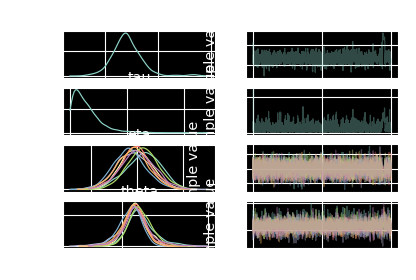

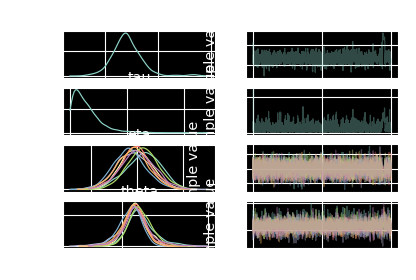

In [3]:
fit.plot()

In [5]:
ocode = """
data {
    int<lower=1> N;
    real y[N];
}
parameters {
    real mu;
    real sigma;
}
model {
    y ~ normal(mu, sigma);
}
"""
sm = pystan.StanModel(model_code=ocode)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_29bd476d0157b5d7c7343959b946aa2c NOW.


In [7]:
y2 = np.random.normal(loc=3, scale=2, size=20)
print(np.mean(y2))
print(np.std(y2))

op = sm.optimizing(data=dict(y=y2, N=len(y2)))

op

3.6392790067785112
2.10487213911725


OrderedDict([('mu', array(3.63929738)), ('sigma', array(2.10487142))])

In [10]:
gmm = """

data{
    int<lower=0> N;// number  of  data  points  in  entire  dataset
    int<lower=0> K;// number  of  mixture  components
    int<lower=0> D;//  dimension
    vector[D] y[N];//  observations
    
    real<lower=0> alpha0 ;  //  dirichlet  prior
}

transformed  data{
    vector<lower=0>[K]  alpha0_vec ;
    for (k in 1:K)
    alpha0_vec[k]<-alpha0 ;
}

parameters{
    simplex[K] theta;//  mixing  proportions
    vector[D] mu[K];//  locations  of  mixture  components
    vector<lower=0>[D]  sigma[K] ;   //  standard  deviations  of  mixture  components
}

model{
    //  priors
    theta ~ dirichlet ( alpha0_vec ) ;
    for(k in 1:K)  {
        mu[k]~normal(0.0, 1.0) ;
        sigma[k]~lognormal(0.0, 1.0) ;
    }
    
    //  likelihood
    for(n in 1:N)  {
        real ps[K] ;
        for(k in 1:K)  {
            ps[k]<-log(theta[k]) + normal_log(y[n], mu[k], sigma[k] ) ;
        }increment_log_prob(log_sum_exp(ps));
    }
}
"""





In [11]:
gmm = pystan.StanModel(model_code=gmm)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f3ce46eecdd472db88c6dd3d8d7b7f5b NOW.


In [25]:
N=1000
y_gmm = []
for i in range(N):
    y_gmm.append(np.random.choice([np.random.normal(loc=2, scale=3),np.random.normal(loc=10, scale=1),np.random.normal(loc=20, scale=3)]))

In [26]:
y_gmm

[20.894903957698748,
 5.650460071973657,
 1.8177253549619734,
 1.0613982401337063,
 21.582515599420013,
 9.691067074177292,
 9.210486813633839,
 9.989606943549381,
 9.662703763765212,
 16.021071190501285,
 9.08930166052722,
 3.2647700188967734,
 8.356690414628373,
 26.13270412412289,
 7.173046157566363,
 0.6051469459135157,
 10.515817396499031,
 9.582164847270654,
 0.24480620273889686,
 10.97038243282163,
 2.054626310232397,
 8.730417171882634,
 10.301807936573109,
 -0.9745353123649423,
 -1.0943244713982447,
 9.669006922517502,
 4.392947148079457,
 20.499320416216626,
 23.078511069592157,
 9.19336069681508,
 11.757085208117468,
 -1.0657761908685313,
 10.556894317245845,
 10.724306953699514,
 8.85044684274166,
 14.719096109140732,
 21.85454123600035,
 9.854007980594071,
 11.566510530027749,
 17.609545344297324,
 10.36101647516256,
 11.393837817878383,
 9.668191461978088,
 0.07274488793835232,
 9.789078159320363,
 9.479319622069502,
 9.347065671224989,
 19.46081087715815,
 10.60871007660

(array([ 16., 100., 134.,  65., 214., 159.,  36., 114., 122.,  40.]),
 array([-6.09367676, -2.8496807 ,  0.39431537,  3.63831143,  6.88230749,
        10.12630355, 13.37029961, 16.61429568, 19.85829174, 23.1022878 ,
        26.34628386]),
 <a list of 10 Patch objects>)

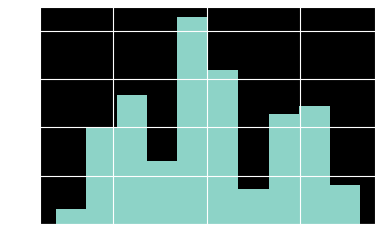

In [27]:
plt.hist(y_gmm)

In [35]:
gmm_dat = {'N': N,
               'K': 3,
               'D': 1,
                'y':y_gmm}

fit = gmm.sampling(data=gmm_dat, iter=1000, chains=4)

RuntimeError: Exception: mismatch in number dimensions declared and found in context; processing stage=data initialization; variable name=y; dims declared=(1000,1); dims found=(1000)  (in 'unknown file name' at line 7)


In [29]:
print(fit)

Inference for Stan model: anon_model_29bd476d0157b5d7c7343959b946aa2c.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     10.34  6.2e-3   0.25   9.84  10.17  10.33  10.51  10.86   1670    1.0
sigma   7.68  4.4e-3   0.17   7.35   7.56   7.68   7.79    8.0   1430    1.0
lp__   -2538    0.04   1.05  -2541  -2538  -2537  -2537  -2537    890    1.0

Samples were drawn using NUTS at Sat Jan 18 17:55:08 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


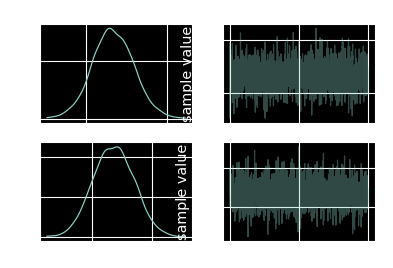

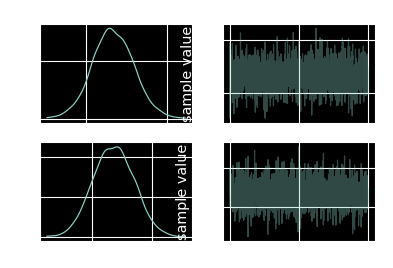

In [30]:
fit.plot()

In [32]:
op = sm.optimizing(data=gmm_dat)
op

OrderedDict([('mu', array(10.3330787)), ('sigma', array(7.66855355))])

# Finding $\mu$ and $\sigma$ of Gaussian distribution

In [158]:
import pystan
import numpy as np
import seaborn as sns
sns.set()

In [62]:
normal = """

data{
    int<lower=0> N;// number  of  data  points  in  entire  dataset
    vector[N] y;//  observations
}


parameters{
    real mu;//  locations  of  mixture  components
    real<lower=0> sigma;   //  standard  deviations  of  mixture  components
}

model{
    //  priors
    mu~normal(0.0, 10.0) ;
    sigma~lognormal(0.0, 2.0) ;
    
    //  likelihood
    y~normal(mu, sigma);
}
"""

In [63]:
norm_model = pystan.StanModel(model_code=normal)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2962dfc301378cd7b339e38d509ed03c NOW.


In [65]:
N=10000
mu = np.random.normal(0,10)
sigmas = np.random.lognormal(0,2)
y = np.random.normal(mu,sigmas, size=N)
    
norm_dat = {'N': N,'y':y}

In [68]:
op = norm_model.optimizing(data=norm_dat)

print(op)
print()
print(mu, sigmas)

OrderedDict([('mu', array(-11.81974879)), ('sigma', array(0.08714183))])

-11.821100056685715 0.08774009939505567


# PPCA

In [84]:
from mpl_toolkits.mplot3d import Axes3D

In [150]:
latent = """

data{
    int<lower=0> N;// number  of  datapoints
    int<lower=0> D;// number  of  dimensions  in  observed  dataset
    int<lower=0> M;// number  of  dimensions  in  latent  dataset
    vector[D] x[N];//  observations
}


parameters{
    matrix[M,N] z;  // latent data
    matrix[D,M] W;  // factor loadings
    real<lower=0> sigma;   //  standard  deviations
}

model{
    //  priors
    to_vector(z) ~ normal(0.0,1.0);
    for (d in 1:D)
        W[d] ~ normal(0.0,sigma);
    sigma~lognormal(0.0, 1.0) ;
    
    //  likelihood
    for (n in 1:N)
        x[n] ~ normal(W*col(z,n), sigma);
}
"""

In [142]:
ppca = pystan.StanModel(model_code=latent)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c8f34402276fb5cc67587951916679ef NOW.


In [143]:
N=1000
M=2
D=3
z = np.random.normal(0,1, size=(N,M))
sigma = np.random.lognormal(0,1)
W = np.random.normal(0,sigma,size=(M,D))
x = np.random.normal(np.matmul(z,W),sigma)
    
ppca_dat = {'N': N, 'D':D, 'M':M, 'x':x}

In [144]:
op = ppca.optimizing(data=ppca_dat)

z_sim = op['z'].T
sigma_sim = op['sigma']
W_sim = op['W'].T
x_sim = np.random.normal(np.matmul(z_sim,W_sim),sigma_sim)

print('real sigma: ', sigma)
print('simulated sigma: ', sigma_sim)
print()
print('real z: ', z)
print('simulated z: ', z_sim)
print()
print('real W: ', W)
print('simulated W: ', W_sim)
print()

real sigma:  2.827542774743566
simulated sigma:  1.7012345756424614

real z:  [[-0.05503212  1.179799  ]
 [ 0.86680197  0.33790879]
 [ 1.10919326  1.30072057]
 ...
 [ 1.95316083  0.50310222]
 [-0.17872953  0.27000214]
 [-0.69085374 -0.8784689 ]]
simulated z:  [[ 0.15760031 -0.44538111]
 [ 0.38380032 -0.24100114]
 [ 0.42018654 -0.18805294]
 ...
 [ 0.78878727 -0.07636974]
 [ 0.05954813 -0.22937902]
 [-0.14557398  0.14518234]]

real W:  [[ 4.34226334  5.87295058  2.44380491]
 [ 3.45226566 -1.5088848  -1.70601699]]
simulated W:  [[ 13.58427719  14.66577615   5.79249945]
 [-11.38603226   8.40865676   8.05001046]]



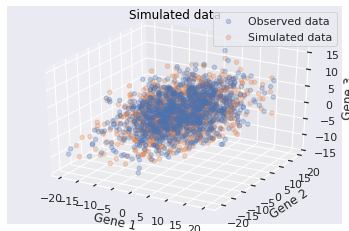

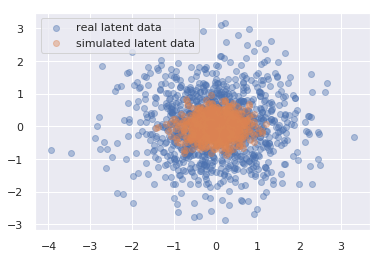

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2], label='Observed data', alpha=0.3)
ax.scatter(x_sim[:,0],x_sim[:,1],x_sim[:,2], label='Simulated data', alpha=0.3)
title = ax.set_title("Simulated data")
plt.setp(title, color='black') 
ax.set_xlabel('Gene 1')
ax.set_ylabel('Gene 2')
ax.set_zlabel('Gene 3')
plt.legend()
plt.show()

plt.scatter(z[:,0], z[:,1], label='real latent data', alpha=0.4)
plt.scatter(z_sim[:,0], z_sim[:,1], label='simulated latent data', alpha=0.4)
plt.legend()
plt.show()

# Gaussian mixture model

In [57]:
gmm_code = """

data{
    int<lower=0> N;// number  of  data  points  in  entire  dataset
    int<lower=0> K;// number  of  mixture  components
    vector[N] y;//  observations
}


parameters{
    simplex[K] pi;//  mixing  proportions
    vector[K] mu;//  locations  of  mixture  components
    vector<lower=0>[K] sigma;   //  standard  deviations  of  mixture  components
}

model{
    //  priors
    for(k in 1:K)  {
        mu[k]~normal(0.0, 10.0) ;
        sigma[k]~lognormal(0.0, 2.0) ;
    }
    
    //  likelihood
    for(n in 1:N)  {
        real ps[K] ;
        for(k in 1:K)  {
            ps[k]<-log(pi[k]) + normal_log(y[n], mu[k], sigma[k] ) ;
        }increment_log_prob(log_sum_exp(ps));
    }
}
"""

In [4]:
gmm = pystan.StanModel(model_code=gmm_code)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_29d0bad207f21fa01360839999204f10 NOW.


In [5]:
N=10000
y_gmm = []
mu = np.random.normal(0,10,size=3)
sigmas = np.random.lognormal(0,2,size=3)
probs = np.random.dirichlet(np.ones(3))
for i in range(N):
    opt = np.random.choice([0,1,2],p=probs)
    y_gmm.append(np.random.normal(mu[opt],sigmas[opt]))
    
gmm_dat = {'N': N,'K': 3,'y':y_gmm}

In [6]:
op = gmm.optimizing(data=gmm_dat)

print(op)
print()
print(probs, mu, sigmas)

OrderedDict([('pi', array([6.89456971e-06, 2.56894501e-01, 7.43098604e-01])), ('mu', array([ -1.36407112,  13.8472097 , -15.1662735 ])), ('sigma', array([0.01387613, 2.47050705, 2.48282139]))])

[0.45765784 0.28384993 0.25849223] [-16.11810557 -13.58088659  13.83334686] [2.73638221 0.33475567 2.43994944]


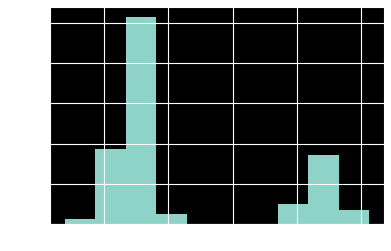

In [7]:
plt.hist(y_gmm)
plt.show()

In [ ]:
fit = gmm.sampling(data=gmm_dat, iter=1000, chains=4)

Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Process ForkPoolWorker-5:
Process ForkPoolWorker-4:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/p

In [ ]:
fit.plot()

In [42]:
sns.set()

# Linear regression

In [36]:
linear = """

data{
    int<lower=1> N;// number  of  data  points  in  entire  dataset
    vector[N] x;//  input
    vector[N] y;//  output
}


parameters{
    real alpha;// intercept
    real beta;// slope
    real<lower=0> sigma;
}

model{

    //  priors
    y~normal(alpha + beta*x, sigma);
    
}
"""

In [37]:
lm = pystan.StanModel(model_code=linear)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cb70b090816a20bba3d49c4b6bc5c4dc NOW.


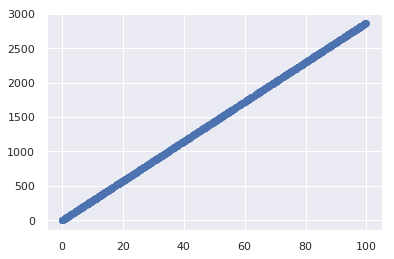

In [51]:
alpha=np.random.normal(0,10)
beta=np.random.normal(0,15)
sigma=np.random.lognormal(0,20)

x = np.random.uniform(low=0,high=100,size=1000)
y = np.random.normal(alpha+beta*x, scale=sigma)

data = {'N':1000,'x':x, 'y':y}

plt.scatter(x,y)
plt.show()

In [52]:
op = lm.optimizing(data=data)

print(op)
print()
print(alpha, beta, sigma)

OrderedDict([('alpha', array(-5.29112875)), ('beta', array(28.78672216)), ('sigma', array(0.00053929))])

-5.291077610116298 28.786721703933214 0.0005475433703866784


In [53]:
fit = lm.sampling(data=data, iter=1000, chains=4)

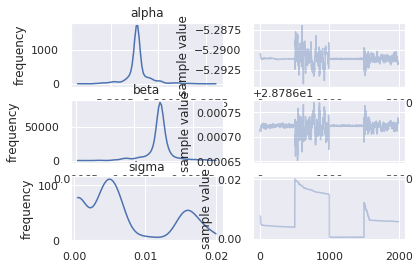

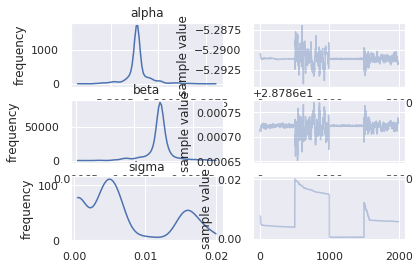

In [54]:
fit.plot()